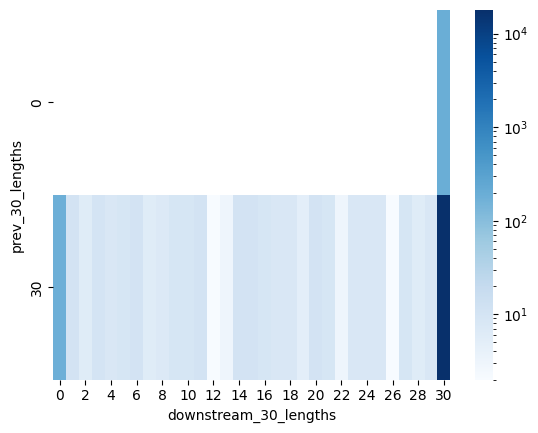

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Assuming your dataframe is called 'df'
sns.heatmap(data=value_counts.pivot(index='prev_30_lengths', columns='downstream_30_lengths', values='count'),norm=colors.LogNorm(), cmap="Blues")
plt.show()



In [14]:

def calculate_au_content(sequence):
    au_count = 0
    for nucleotide in sequence:
        if nucleotide in ['A', 'T', "U"]:
            au_count += 1
            
    return None if len(sequence) == 0 else au_count / len(sequence)


df["au_content_upstream"] = df['upstream_30_nucleotides'].apply(calculate_au_content)
df["au_content_seq"] = df['sequence_slice'].apply(calculate_au_content)
df["au_content_downstream"] = df['downstream_30_nucleotides'].apply(calculate_au_content)



In [15]:
df.head()

,id,mirna_sequence,true_start,true_end,mrna_sequence,true_seed_type,num_basepairs,seed_basepairs,folding_energy,true_folding_class,mirna_accession,mirna_name,ensg,enst,gene_name,full_sequence,upstream_30_nucleotides,sequence_slice,downstream_30_nucleotides,is_sequences_same,prev_30_lengths,downstream_30_lengths,au_content_prev,au_content_seq,au_content_following
0,0727A-1038930_1,TGAGGTAGTAGGTTGTATAGTT,1791,1890,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,noncanonical_seed,20,6,-25.1,III,MIMAT0000062,let-7a,ENSG00000113328,ENST00000340828,CCNG1,AGGGCAGGCGCGGCCCCTTCGGCTCCGAGCTGACCCTGATCAGGGC...,TTTAATATTTTTTTCTAGAAAACAGGTGAC,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,TATCACTTCGAAAACTTGCTTTCCCACACT,True,30,30,0.766667,0.730000,0.600000
1,L1HS-1112536_1,TGAGGTAGTAGGTTGTATAGTT,3857,3928,CAGGAAATACCCGTGCAACCAACTACCTCATATTCCATTCAGAATT...,9-mer,17,6,-24.4,II,MIMAT0000062,let-7a,ENSG00000100697,ENST00000343455,DICER1,CGGAGGCGCGGCGCAGGCTGCTGCAGGCCCAGGTGAATGGAGTAAC...,TGCCAAGGAAATCAGCTAAATTACTACAAG,CAGGAAATACCCGTGCAACCAACTACCTCATATTCCATTCAGAATT...,CCCAGCGATGAATGTACTCTCCTGAGTAAT,True,30,30,0.633333,0.555556,0.533333
2,L2HS-818542_2,TGAGGTAGTAGGTTGTATAGTT,2385,2434,ACCCGCTATATGACCTGATGCCTTTCCTTCATTAAAGATGATTCTG...,noncanonical_seed,19,6,-22.2,III,MIMAT0000062,let-7a,ENSG00000080546,ENST00000436639,SESN1,GATTGCCAGGGCCGCCCTGTGCCCTCTGGCTCGGCGGTGGTGGGCG...,GCAGAACTCCTTTATGCTCTGAGAGCCATT,ACCCGCTATATGACCTGATGCCTTTCCTTCATTAAAGATGATTCTG...,GATCAGCAGATATAGTCTACAAGGGGGAAG,True,30,30,0.533333,0.600000,0.533333
3,L2HS-1161339_2,TGAGGTAGTAGGTTGTATAGTT,6570,6623,CAATGACTATGCAACCATACCTTACCACTAAATGTAGTACGCAAAA...,noncanonical_seed,18,6,-22.1,III,MIMAT0000062,let-7a,ENSG00000164190,ENST00000282516,NIPBL,TCCGGTCGGCATTTTGTTCTGAGAGGGAGAGACGGAACGAGAGAGA...,AAATAAGACCCCAGCTCATGGTTAAACATG,CAATGACTATGCAACCATACCTTACCACTAAATGTAGTACGCAAAA...,TGGTTATCTGCAATGTTGCAAAAATCCTAG,True,30,30,0.600000,0.648148,0.633333
4,L2-407944_2,TGAGGTAGTAGGTTGTATAGTT,1164,1208,AATACTGGGAAACCTGCTACTTCGTCAGCTAACCAGAAACCTGTG,noncanonical_seed,18,6,-21.9,III,MIMAT0000062,let-7a,ENSG00000138785,ENST00000340139,INTS12,AGGGACCACCGGGAACAGACGGATCGGCAGGGCGGGGCGGAACGGT...,ACAGCAAAATTGAGTTCAACAACACAAAAC,AATACTGGGAAACCTGCTACTTCGTCAGCTAACCAGAAACCTGTG,GGTTTGACTGGTCTGGCAACATCATCCAAA,True,30,30,0.666667,0.533333,0.533333


In [16]:


df['flank_upstream_far'] = df['upstream_30_nucleotides'].str[-2]
df['flank_upstream_near'] = df['upstream_30_nucleotides'].str[-1]

df['flank_downstream_near'] = df['downstream_30_nucleotides'].str[0]
df['flank_downstream_far'] = df['downstream_30_nucleotides'].str[1]

flank_columns = ['flank_upstream_far', 'flank_upstream_near', 'flank_downstream_near', 'flank_downstream_far']

for column in flank_columns:
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.set_categories(['A', 'T', 'C', 'G'], ordered=False)


df.head()

,id,mirna_sequence,true_start,true_end,mrna_sequence,true_seed_type,num_basepairs,seed_basepairs,folding_energy,true_folding_class,mirna_accession,mirna_name,ensg,enst,gene_name,full_sequence,upstream_30_nucleotides,sequence_slice,downstream_30_nucleotides,is_sequences_same,prev_30_lengths,downstream_30_lengths,au_content_prev,au_content_seq,au_content_following,flank_upstream_far,flank_upstream_near,flank_downstream_near,flank_downstream_far
0,0727A-1038930_1,TGAGGTAGTAGGTTGTATAGTT,1791,1890,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,noncanonical_seed,20,6,-25.1,III,MIMAT0000062,let-7a,ENSG00000113328,ENST00000340828,CCNG1,AGGGCAGGCGCGGCCCCTTCGGCTCCGAGCTGACCCTGATCAGGGC...,TTTAATATTTTTTTCTAGAAAACAGGTGAC,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,TATCACTTCGAAAACTTGCTTTCCCACACT,True,30,30,0.766667,0.730000,0.600000,A,C,T,A
1,L1HS-1112536_1,TGAGGTAGTAGGTTGTATAGTT,3857,3928,CAGGAAATACCCGTGCAACCAACTACCTCATATTCCATTCAGAATT...,9-mer,17,6,-24.4,II,MIMAT0000062,let-7a,ENSG00000100697,ENST00000343455,DICER1,CGGAGGCGCGGCGCAGGCTGCTGCAGGCCCAGGTGAATGGAGTAAC...,TGCCAAGGAAATCAGCTAAATTACTACAAG,CAGGAAATACCCGTGCAACCAACTACCTCATATTCCATTCAGAATT...,CCCAGCGATGAATGTACTCTCCTGAGTAAT,True,30,30,0.633333,0.555556,0.533333,A,G,C,C
2,L2HS-818542_2,TGAGGTAGTAGGTTGTATAGTT,2385,2434,ACCCGCTATATGACCTGATGCCTTTCCTTCATTAAAGATGATTCTG...,noncanonical_seed,19,6,-22.2,III,MIMAT0000062,let-7a,ENSG00000080546,ENST00000436639,SESN1,GATTGCCAGGGCCGCCCTGTGCCCTCTGGCTCGGCGGTGGTGGGCG...,GCAGAACTCCTTTATGCTCTGAGAGCCATT,ACCCGCTATATGACCTGATGCCTTTCCTTCATTAAAGATGATTCTG...,GATCAGCAGATATAGTCTACAAGGGGGAAG,True,30,30,0.533333,0.600000,0.533333,T,T,G,A
3,L2HS-1161339_2,TGAGGTAGTAGGTTGTATAGTT,6570,6623,CAATGACTATGCAACCATACCTTACCACTAAATGTAGTACGCAAAA...,noncanonical_seed,18,6,-22.1,III,MIMAT0000062,let-7a,ENSG00000164190,ENST00000282516,NIPBL,TCCGGTCGGCATTTTGTTCTGAGAGGGAGAGACGGAACGAGAGAGA...,AAATAAGACCCCAGCTCATGGTTAAACATG,CAATGACTATGCAACCATACCTTACCACTAAATGTAGTACGCAAAA...,TGGTTATCTGCAATGTTGCAAAAATCCTAG,True,30,30,0.600000,0.648148,0.633333,T,G,T,G
4,L2-407944_2,TGAGGTAGTAGGTTGTATAGTT,1164,1208,AATACTGGGAAACCTGCTACTTCGTCAGCTAACCAGAAACCTGTG,noncanonical_seed,18,6,-21.9,III,MIMAT0000062,let-7a,ENSG00000138785,ENST00000340139,INTS12,AGGGACCACCGGGAACAGACGGATCGGCAGGGCGGGGCGGAACGGT...,ACAGCAAAATTGAGTTCAACAACACAAAAC,AATACTGGGAAACCTGCTACTTCGTCAGCTAACCAGAAACCTGTG,GGTTTGACTGGTCTGGCAACATCATCCAAA,True,30,30,0.666667,0.533333,0.533333,A,C,G,G
